In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df = pd.read_csv('SCHGROUP_data.csv')

# Filter the data for billable hours only
df = df[df["BillType"] == "Billable"]

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# remove "$" and "-" symbols from BillRate and TotalAmount fields
for field in ["BillRate","TotalAmount"]:
    df[field] = df[field].str.replace("$-","0")
    df[field] = df[field].str.replace("$","")
    df[field] = df[field].str.replace("-","")
    df[field] = df[field].str.replace(",","")
    df[field] = df[field].str.replace(" ","")
    try:
        df[field] = df[field].astype(float)
    except: pass

# Filter the data by year
df_2019 = df[df['Date'].dt.year == 2019]
df_2020 = df[df['Date'].dt.year == 2020]
df_2021 = df[df['Date'].dt.year == 2021]


/var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/ipykernel_9633/761365467.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace("$-","0")
/var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/ipykernel_9633/761365467.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[field] = df[field].str.replace("$","")


#### Which department had the most billable hours in 2019, 2020, and 2021?

In [2]:


# Group the data by department and sum the Hours column
hours_2019 = df_2019.groupby('DeptName')['Hours'].sum()

hours_2020 = df_2020.groupby('DeptName')['Hours'].sum()
hours_2021 = df_2021.groupby('DeptName')['Hours'].sum()

# Find the department with the highest billable hours in each year
max_dept_2019 = hours_2019.idxmax()
max_dept_2020 = hours_2020.idxmax()
max_dept_2021 = hours_2021.idxmax()

# Sort by Hours
h2019=hours_2019.reset_index().sort_values(by='Hours', ascending=False)
h2020=hours_2020.reset_index().sort_values(by='Hours', ascending=False)
h2021=hours_2021.reset_index().sort_values(by='Hours', ascending=False)

print(f"The department with the most billable hours in 2019 was {max_dept_2019}.")
print(f"The department with the most billable hours in 2020 was {max_dept_2020}.")
print(f"The department with the most billable hours in 2021 was {max_dept_2021}.")

The department with the most billable hours in 2019 was TAS - Audit.
The department with the most billable hours in 2020 was TAS - Audit.
The department with the most billable hours in 2021 was TAS - Audit.


#### Which client had the highest total billable amount in each year?


In [3]:
# convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# create a new column for the year
df['Year'] = df['Date'].dt.year

# group the dataset by Year and ClientNum, and calculate the sum of TotalAmount
grouped_df = df.groupby(['Year', 'ClientNum'])['TotalAmount'].sum().reset_index()

# sort the dataframe by TotalAmount in descending order
sorted_df = grouped_df.sort_values(['Year', 'TotalAmount'], ascending=[True, False])

# select the top row for each year
result = sorted_df.groupby('Year').first().reset_index()

# print the result
print(result)

   Year ClientNum                                        TotalAmount
0  2019   CLT1579  992.06981.34130.8579.371226.67636.80101.8979.3...
1  2020   CLT3705  997.4383.1283.12262.76249.36494.15249.36415.59...
2  2021   CLT3199         992.06589.88268.13375.381126.13321.7553.63


#### How many different clients used the company's services over the three years?


In [4]:
# Count the number of unique clients in the dataset
num_clients = len(df['ClientNum'].unique())
print(num_clients)

3049


#### Which employee billed the most hours in each year?


In [5]:
# Calculate the sum of billable hours for each employee in each year
employee_hours = df.groupby(['EmployeeId', 'Date'])['Hours'].sum()

# Find the employee with the highest billable hours for each year
highest_employee_hours = employee_hours.groupby('Date').idxmax()

print(highest_employee_hours.head(30))

Date
2019-01-01    (110, 2019-01-01 00:00:00)
2019-01-02    (110, 2019-01-02 00:00:00)
2019-01-03    (110, 2019-01-03 00:00:00)
2019-01-04    (110, 2019-01-04 00:00:00)
2019-01-05    (110, 2019-01-05 00:00:00)
2019-01-06     (64, 2019-01-06 00:00:00)
2019-01-07     (64, 2019-01-07 00:00:00)
2019-01-08      (5, 2019-01-08 00:00:00)
2019-01-09     (64, 2019-01-09 00:00:00)
2019-01-10     (64, 2019-01-10 00:00:00)
2019-01-11     (64, 2019-01-11 00:00:00)
2019-01-12    (226, 2019-01-12 00:00:00)
2019-01-13    (226, 2019-01-13 00:00:00)
2019-01-14     (64, 2019-01-14 00:00:00)
2019-01-15     (64, 2019-01-15 00:00:00)
2019-01-16     (64, 2019-01-16 00:00:00)
2019-01-17    (110, 2019-01-17 00:00:00)
2019-01-18    (110, 2019-01-18 00:00:00)
2019-01-19    (113, 2019-01-19 00:00:00)
2019-01-20    (122, 2019-01-20 00:00:00)
2019-01-21    (147, 2019-01-21 00:00:00)
2019-01-22    (122, 2019-01-22 00:00:00)
2019-01-23    (147, 2019-01-23 00:00:00)
2019-01-24    (147, 2019-01-24 00:00:00)
2019-01-25 

#### What is the overall trend in billable hours over the three years?


/var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/ipykernel_9633/510641393.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_totals = df.groupby('Year')[['Hours', 'TotalAmount']].sum()


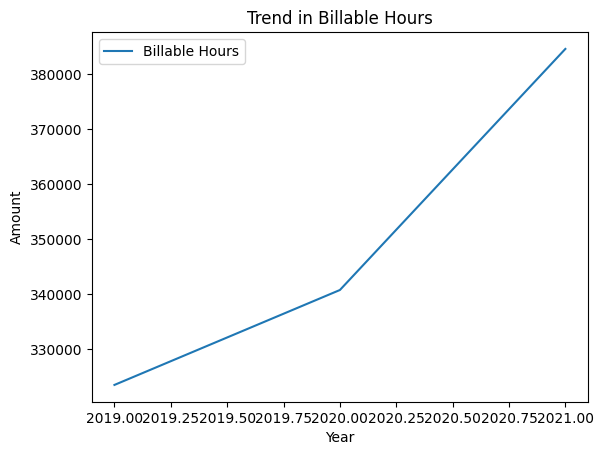

In [6]:
# Create a new column for the year
df['Year'] = df['Date'].dt.year

# Group the data by year and sum the Hours and TotalAmount columns
yearly_totals = df.groupby('Year')[['Hours', 'TotalAmount']].sum()



# Plot the trends in billable hours and billable amount
plt.plot(yearly_totals.index, yearly_totals['Hours'], label='Billable Hours')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Trend in Billable Hours')
plt.legend()
plt.show()

#### What is the total amount billed by each employee in each year?


In [7]:
# Group the data by year and employee id and sum the TotalAmount column
employee_yearly_totals = df.groupby(['Year', 'EmployeeId'])['TotalAmount'].sum()

# Print the results
print(employee_yearly_totals)

Year  EmployeeId
2019  0             81.78949.16316.39158.19158.19158.19158.19890.1...
      5             99.2153.6399.21536.25198.41396.83198.41198.414...
      8             109.93164.9054.97439.73337.8484.46168.9284.461...
      9             61.67107.25632.78316.39126.561866.1599.2181.78...
      42            3783.24223.6281.78408.89198.41804.38778.90111....
                                          ...                        
2021  1495                                                     482.63
      1498          337.84337.84115.2957.65361.97107.25107.25353.9...
      1505                                         415.59166.24884.81
      1506          297.62198.41195.20248.0280.4455.77361.97139.43...
      1508                                                     284.21
Name: TotalAmount, Length: 1070, dtype: object


#### distribution of billable rates across all departments


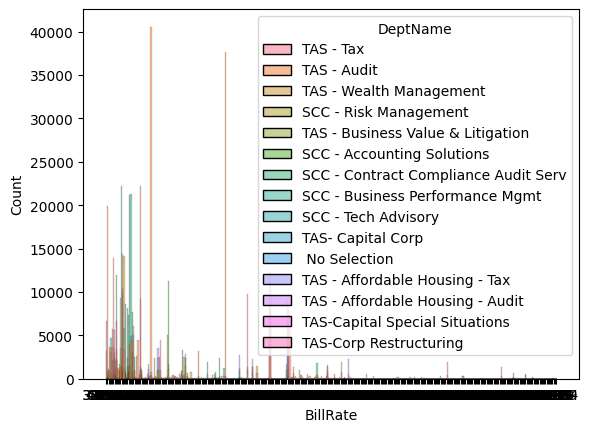

In [8]:
# Plot the distribution of billable rates across all departments
sns.histplot(data=df, x='BillRate', hue='DeptName')
plt.show()

#### What is the average billable rate for each client over the three years?


In [11]:
# Calculate the mean billable rate for each client in each year
#mean_billable_rate = df.groupby(['ClientNum', 'Date'])['BillRate'].mean()
#print(mean_billable_rate)


#### Clients who consistently have high or low billable rates?


#### Departments that consistently underperform in terms of billable amount

In [33]:
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')

# Group the data by department and calculate the average total amount per department
dept_totals = df.groupby(['DeptID', 'DeptName'])['TotalAmount'].mean()

# Calculate the overall average total amount for billable transactions
overall_avg = df['TotalAmount'].mean()

# Identify departments that consistently underperform (i.e., have a total amount below the overall average)
underperforming_depts = dept_totals[dept_totals < overall_avg]
overperforming_depts = dept_totals[dept_totals >= overall_avg]
# Print the list of underperforming departments
print(underperforming_depts)
print("\n")
print(overperforming_depts)

DeptID  DeptName                            
26      TAS - Wealth Management                 298.996765
27      TAS - Audit                             446.118118
29      SCC - Risk Management                   353.642494
30      SCC - Contract Compliance Audit Serv    329.046041
43      TAS - Tax                               420.494936
52      SCC - Accounting Solutions              294.300886
55      TAS - Affordable Housing - Audit        272.682489
56      TAS - Affordable Housing - Tax          180.985515
Name: TotalAmount, dtype: float64


DeptID  DeptName                         
12      SCC - Business Performance Mgmt      1656.556207
41      TAS - Business Value & Litigation    1082.198070
46      TAS- Capital Corp                     952.527642
51      SCC - Tech Advisory                   637.928694
53      TAS-Capital Special Situations       1522.064297
54      TAS-Corp Restructuring                656.371658
Name: TotalAmount, dtype: float64


#### How many different departments are represented in the dataset?


In [ ]:
# Count the number of unique departments in the dataset
num_departments = len(df['DeptName'].unique())
print(num_departments)

#### What is the ratio of billable hours to total hours worked by each employee in each year?

In [ ]:
# Calculate the ratio of billable hours to total hours for each employee in each year
employee_ratio = df.groupby(['EmployeeId', 'Date']).apply(lambda x: x[x['BillType'] == 'Billable']['Hours'].sum() / x['Hours'].sum())

print(employee_ratio)


#### What is the overall distribution of billable hours and billable amount across all clients and departments?


/Users/Yousefmacer/opt/anaconda3/envs/tickpick/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


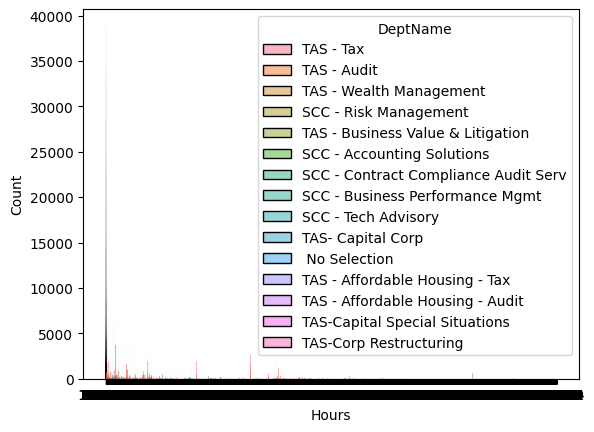

In [17]:
# Plot the distribution of billable hours and total amount across all clients and departments
sns.histplot(data=df, x='Hours', hue='DeptName')
sns.histplot(data=df, x='TotalAmount', hue='DeptName')
plt.show()